# Pymaceuticals Inc.
---

### Analysis

The effect of ten different drug regimens on the tumor size of mice with squamous cell carcinoma (SCC) was studied in a population for 248 male and female mice. Each mouse was administered a different drug while their body weights and tumor volumes were measured over a period of time. In this analysis, the primary goal is to identify any correlations between drug regimen, mouse weight, and tumor size.

The calculations requested for this analysis focus on the final tumor volume of each mouse for four specific drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin). Capomulin and Ramicane have significantly lower final tumor volumes than Infubinol and Ceftamin, however since there is no analysis of the tumor growth over time (i.e. difference between final tumor volume and starting tumor volume), we can't use this data to conclude that Capomulin and Ramicane are more effective at slowing tumor growth.

We also compare average tumor volume to the weight of its respective mouse, and find a strong correlation between higher mouse weight and larger tumor volume. More data about the drug regimens is required to know if higher drug dosing would be more effective on heavier mice, or if drug efficacy reduces as mouse weight increases regardless of dosing.

Although this analysis provides limited insight into this study, we can be confident in the consistency and accuracy of this data as there is only one outlier in the measured data points. Other opportunities for further analysis include comparing drug efficacy to mice of different ages and sexes, as these are important considerations when providing drug type and dosing recommendations.

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [193]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
mouse_study_data.sort_values(by=['Timepoint'])

# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [194]:
# Checking the number of mice.
mouse_study_data["Mouse ID"].nunique()

249

In [195]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [196]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [197]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = mouse_study_data[mouse_study_data["Mouse ID"].str.contains("g989")==False]
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [198]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol = cleaned_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_vol = cleaned_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = cleaned_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor_vol = cleaned_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = cleaned_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                               "Median Tumor Volume":median_tumor_vol,
                               "Tumor Volume Variance":var_tumor_vol,
                               "Tumor Volume Std. Dev.":stddev_tumor_vol,
                               "Tumor Volume Std. Err.":sem_tumor_vol,
                              })
tumor_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [200]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_stats_agg =  cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# make a group series using the 'Drug Regimen' column, counting the number of data points for each Drug Regimen 
timepoint_count = cleaned_mouse_df["Drug Regimen"].value_counts()
timepoint_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Timepoints per Treatment')

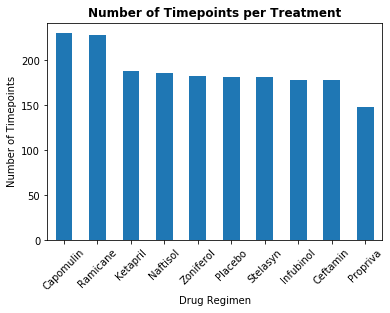

In [202]:
# set up bar graph with Pandas

plot_pandas = timepoint_count.plot.bar()  

# Set the xlabel, ylabel, and title 
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints per Treatment", fontsize=12, fontweight="bold")

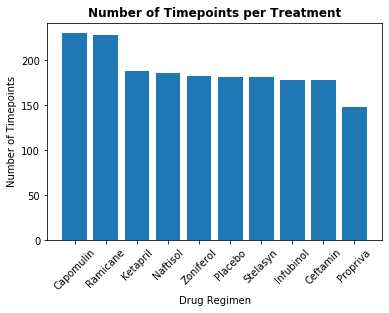

In [203]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoint_count.index.values
y_axis = timepoint_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis)

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Timepoints per Treatment", fontsize=12, fontweight="bold")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)

plt.show()

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Find qty of males and females
sex_count = cleaned_mouse_df["Sex"].value_counts()
sex_count

Male      958
Female    922
Name: Sex, dtype: int64

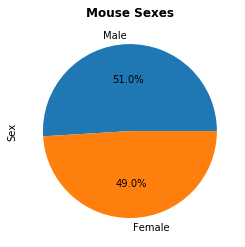

In [205]:
# Create pie chart
plt.title("Mouse Sexes", fontsize=12, fontweight="bold")
sex_count.plot.pie(autopct= "%1.1f%%")
plt.show()

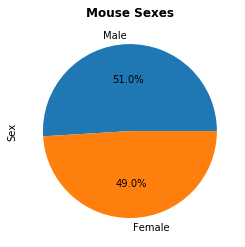

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = sex_count.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Mouse Sexes', fontsize=12, fontweight="bold")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepointmax_df = cleaned_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
timepointmax_df = timepointmax_df.reset_index()
timepointmax_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [208]:
# Make a new df with only the requested drugs
merged_timepoint_df = timepointmax_df.merge(cleaned_mouse_df, on=["Mouse ID", "Timepoint"], how="left")
merged_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [209]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


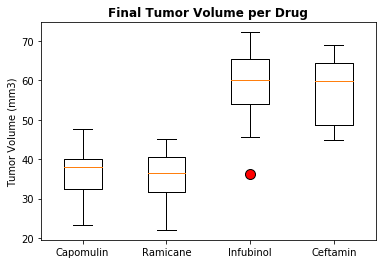

In [210]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug', fontsize=12, fontweight="bold")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

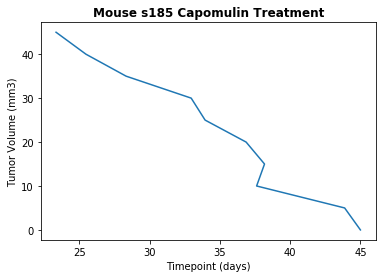

In [211]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# Find mouse treated with Capomulin
mouse = cleaned_mouse_df.loc[cleaned_mouse_df['Mouse ID'] == 's185']

# Format line graph
plt.plot(mouse['Tumor Volume (mm3)'], mouse['Timepoint'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Capomulin Treatment", fontsize=12, fontweight="bold")

plt.show()

In [212]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Make new df with only Capomulin mice
capomulin_df = cleaned_mouse_df.loc[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']

# Group mice and tumor vols into new df and get mean
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge both df's
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')

avg_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,avg_tumor_vol
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


In [213]:
# Make new df that only includes weight and avg tumor vol, removing all but one entry per mouse
final_avg_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_df

,Weight (g),avg_tumor_vol
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


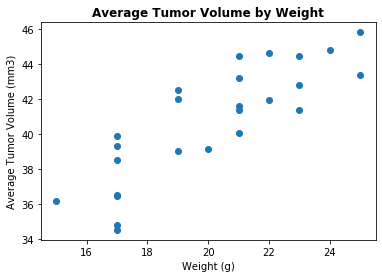

In [214]:
# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(final_avg_df['Weight (g)'], final_avg_df['avg_tumor_vol'])

# Add labels and title
plt.title("Average Tumor Volume by Weight", fontsize=12, fontweight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [215]:
# Perform a linear regression on weight vs tumor vol
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(final_avg_df['Weight (g)'], final_avg_df['avg_tumor_vol'])

# Create equation of line to calculate predicted tumor vol
pe_fit = pe_slope * (final_avg_df['Weight (g)']) + pe_int

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


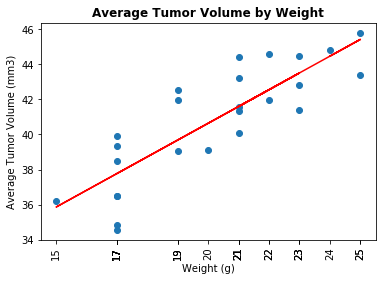

In [216]:
# Calculate and print the correlation coefficient between mouse weight and avg tumor vol using st.pearsonr
print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {round(st.pearsonr(final_avg_df['Weight (g)'], final_avg_df['avg_tumor_vol']) [0],2)}.")

# Plot the linear model on top of scatter plot 
plt.scatter(final_avg_df['Weight (g)'], final_avg_df['avg_tumor_vol'])
plt.plot(final_avg_df['Weight (g)'],pe_fit, linewidth=1.5, color="r")
plt.title("Average Tumor Volume by Weight", fontsize=12, fontweight="bold")
plt.xticks(final_avg_df['Weight (g)'], rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()